# Testing the Infant filter directly on a small set of alerts

Will try to load the Infant filter and test it by parsing a tar of alerts.

In [1]:
import logging, os
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logpath = '/home/jnordin/tmp/'
handler = logging.FileHandler(os.path.join(logpath, 'test_infantsnt0.log'))
logger.addHandler(handler)

First step is to load the filter, using the path specified in the `setup.py` file in the repository. 


In [2]:
from ampel.contrib.weizmann.t0.InfantFilter import InfantFilter

The full behaviour of a T0 unit is controlled by a set of parameters provided as `run_config`. We here directly specify these as a dictionary. When implemented for a live channel these constitue one entry to the `channel.json` main configuration file.

In [3]:
runConfig = {
                    "min_ndet": 1,
                    "max_ndet": 10,
                    "min_tspan": 0.02,
                    "max_tspan": 4.5,
                    "max_tul": 2.5,
                    "min_rb": 0.3,
                    "min_drb": 0.3,
                    "min_fwhm": 0.5,
                    "max_fwhm": 5.0,
                    "max_elong": 100,
                    "max_magdiff": 0.75,
                    "max_nbad": 5,
                    "min_sso_dist": 20,
                    "min_gal_lat": 14,
                    "gaia_rs": 40,
                    "gaia_pm_signif": 3,
                    "gaia_plx_signif": 3,
                    "gaia_veto_gmag_min": 9,
                    "gaia_veto_gmag_max": 20,
                    "gaia_excessnoise_sig_max": 999,
                    "ps1_sgveto_rad": 2,
                    "ps1_sgveto_th": 0.76,
                    "ps1_confusion_rad": 3,
                    "ps1_confusion_sg_tol": 0.1,
                    }

In [4]:
# Temporarily remove gaia matching (not available)
runConfig['gaia_rs'] = 0
# Running on old alert collections prior to DRB, so disable this
#runConfig["MIN_DRB"] =  0
# There will be no transients with only one detection and a detection history. Preferred?
runConfig["min_tspan"] =  0


In [5]:
my_filter = InfantFilter(**runConfig, logger=logger)

In [6]:
from ampel.ztf.dev.DevAlertProcessor import DevAlertProcessor

dap = DevAlertProcessor(my_filter )

In [7]:
# Get alert files (from ampel archive, mars, lasair etc)
# For ZTF21aaiaqhh there are four public available at Feb 10, which I collected in a tar
tar_path = '/home/jnordin/Downloads/ZTF21aaiaqhh_feb102021.tar.gz'

In [8]:
import time

print ("processing alerts from %s" % tar_path)
start = time.time()
nproc = dap.process_tar(tar_path, iter_max=2000)
end = time.time()
print ("processed %d alerts in %.2e sec"%(nproc, end-start))

processing alerts from /home/jnordin/Downloads/ZTF21aaiaqhh_feb102021.tar.gz
processed 4 alerts in 2.38e-02 sec


In [9]:
n_good, n_bad = len(dap.get_accepted_alerts()), len(dap.get_rejected_alerts())
print ("%d alerts accepted by the filter (%.2f perc)"%(n_good, 100*n_good/nproc))
print ("%d alerts rejected by the filter (%.2f perc)"%(n_bad, 100*n_bad/nproc))

4 alerts accepted by the filter (100.00 perc)
0 alerts rejected by the filter (0.00 perc)


In [10]:
from ampel.ztf.alert.PhotoAlertPlotter import PhotoAlertPlotter
from random import choice

accepted = dap.get_accepted_alerts()
accepted_plot = PhotoAlertPlotter(interactive=True)

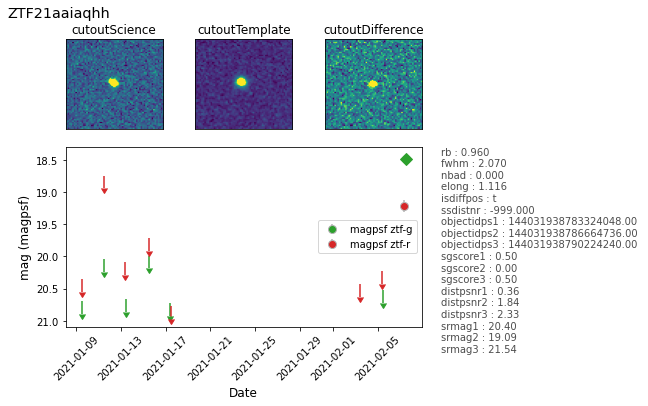

In [11]:
accepted_plot.summary_plot(choice(accepted))